In [1]:
# Include this line to make plots interactive
%matplotlib notebook

In [2]:

import requests 
import json
import pandas as pd
import numpy as np
from scipy import stats
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline
import gmaps
from pandas.io.json import json_normalize

#set ggplot style
plt.style.use('ggplot')


In [3]:
client = Socrata("chronicdata.cdc.gov", None)
url = "https://chronicdata.cdc.gov/resource/rb39-ixr6.json"
results = client.get("rb39-ixr6", limit=38708)

In [4]:
#results

In [5]:
#print(requests.get(url))

In [6]:
#print(requests.get(url).json())

In [7]:
#response = requests.get(url).json()
#print(json.dumps(response, indent = 4, sort_keys=True))
#marked out due to API stuff discussed with Brent

In [8]:
health_df = pd.DataFrame(results)
health_df.count()

:@computed_region_bxsw_vy29    37220
:@computed_region_he4y_prf8    37750
age                            38708
data_value                     24275
data_value_footnote            14433
data_value_footnote_symbol     14433
data_value_std_err             24275
data_value_type                38708
data_value_unit                38708
datasource                     38708
displayorder                   38708
education                      38708
gender                         38708
geolocation                    38708
high_confidence_limit          24275
locationabbr                   38708
locationdesc                   38708
low_confidence_limit           24275
measuredesc                    38708
measureid                      38708
race                           38708
response                       38708
sample_size                    24275
stratificationid1              38708
stratificationid2              38708
stratificationid3              38708
stratificationid4              38708
s

In [9]:
#Collecting a list of all columns within the DataFrame/
health_df.columns

Index([':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8', 'age',
       'data_value', 'data_value_footnote', 'data_value_footnote_symbol',
       'data_value_std_err', 'data_value_type', 'data_value_unit',
       'datasource', 'displayorder', 'education', 'gender', 'geolocation',
       'high_confidence_limit', 'locationabbr', 'locationdesc',
       'low_confidence_limit', 'measuredesc', 'measureid', 'race', 'response',
       'sample_size', 'stratificationid1', 'stratificationid2',
       'stratificationid3', 'stratificationid4', 'submeasure', 'submeasureid',
       'topicdesc', 'topicid', 'topictype', 'topictypeid', 'year'],
      dtype='object')

In [10]:
#Reorganizing the columns using double brackets
organized_df = health_df[["locationabbr","year","locationdesc","topicdesc","measuredesc","submeasure","data_value","sample_size","gender","age","race","response","education", "geolocation"]]
organized_df.head()

,locationabbr,year,locationdesc,topicdesc,measuredesc,submeasure,data_value,sample_size,gender,age,race,response,education,geolocation
0,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [11]:
#latlong2 = (pd.concat({i: json_normalize(x) for i, x in organized_df.pop('geolocation').items()})
        # .reset_index(level=1, drop=True)
        # .join(organized_df)
         #.reset_index(drop=True))
#latlong2.head()

In [12]:
#latlong3 = pd.DataFrame(latlong2["coordinates"].values.tolist())
#latlong3.head()

In [13]:
#renamedlatlong = latlong3.rename(columns={0:"Lat",1:"Lon"})
#renamedlatlong.head()

In [14]:
#new_df = pd.merge(organized_df, renamedlatlong, left_index=True, right_index=True, how='inner')
#new_df.head()

In [15]:
#organized_df = new_df
#organized_df.head()

In [16]:
renamed_df = organized_df.rename(columns={"locationabbr":"Location Code","year":"Year","locationdesc":"State","topicdesc":"Use Type","measuredesc":"Status","submeasure":"Frequency","data_value":"% of Respondents","sample_size":"Sample Size","gender":"Gender","age":"Age","race":"Race","response":"User Status","education":"Education"})
renamed_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,User Status,Education,geolocation
0,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [17]:
Minus_Nat= renamed_df.loc[renamed_df["State"] !="National (States and DC)"]
Minus_PR = Minus_Nat.loc[Minus_Nat["State"] !="Puerto Rico"]
Minus_NatPRGuam = Minus_PR.loc[Minus_PR["State"] !="Guam"]
Minus_NatPRGuam.head()
#Minus_Ohio['C'] = np.arange(len(Minus_Ohio))
#print (Minus_Ohio)

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,User Status,Education,geolocation
0,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [18]:
USA=Minus_NatPRGuam.dropna(how='any')
USA.head()
#USA.count()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,User Status,Education,geolocation
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."
5,DE,2005,Delaware,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,5.1,2684,Overall,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-75.57774116..."
7,AL,2005,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.1,570,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."


In [19]:
USA[['% of Respondents']]=USA[['% of Respondents']].astype(float)

    

C:\Users\kahme\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [20]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
grouped_usa_df = USA.groupby(['Year','Gender']).mean()

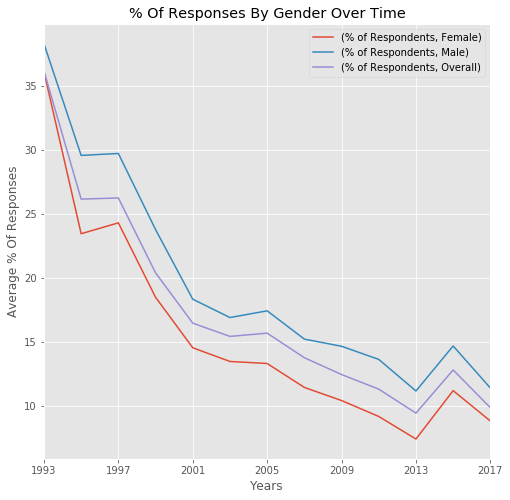

In [21]:

# Use unstack() to Plot all users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
grouped_usa_df.unstack().plot(ax=ax)
plt.title("% Of Responses By Gender Over Time")
plt.xlabel("Years")
plt.ylabel("Average % Of Responses")
leg = ax.legend()







In [22]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
USA_eCig=USA.loc[USA["Use Type"] ==("E-Cigarette Use (Youth)")]
USA_eCig.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,User Status,Education,geolocation
23,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,42.1,119,Overall,All Ages,Hispanic,Ever,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."
41,IN,2015,Indiana,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.4,118,Overall,All Ages,Multiple Race,Current,High School,"{'type': 'Point', 'coordinates': [-86.14996019..."
54,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,19.7,1333,Overall,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."
97,MA,2015,Massachusetts,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.7,3077,Overall,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-72.08269067..."
131,AZ,2015,Arizona,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,51.6,2490,Overall,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-111.7638112..."


In [23]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
USA_eCig_Avg = USA_eCig.groupby(['Year','Gender']).mean()

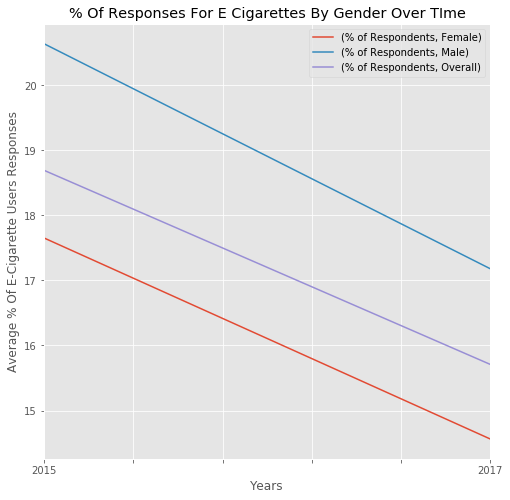

In [24]:
# Use unstack() to Plot the E-Cigarette users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
USA_eCig_Avg.unstack().plot(ax=ax)
plt.title("% Of Responses For E Cigarettes By Gender Over TIme")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()




In [25]:
grouped_usa_Ethinicity = USA.groupby(['Year','Race']).mean()

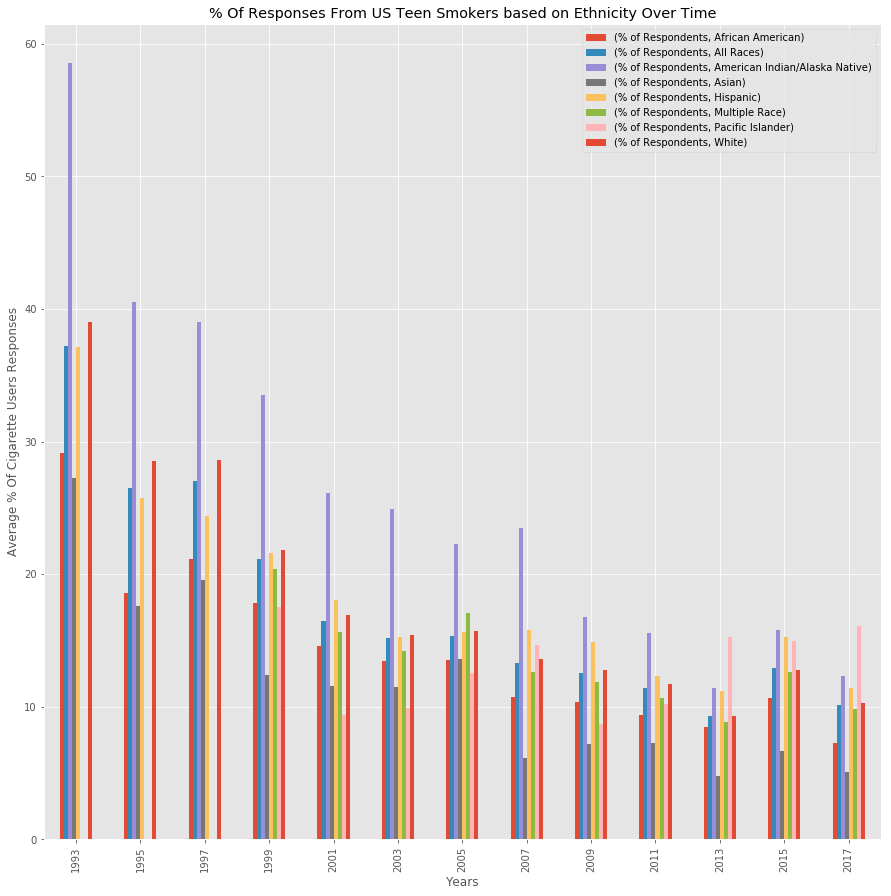

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
grouped_usa_Ethinicity.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US Teen Smokers based on Ethnicity Over Time")
plt.xlabel("Years")
plt.ylabel("Average % Of Cigarette Users Responses")
leg = ax.legend()

In [27]:
USA_eCig_Etinicity = USA_eCig.groupby(['Year','Race']).mean()

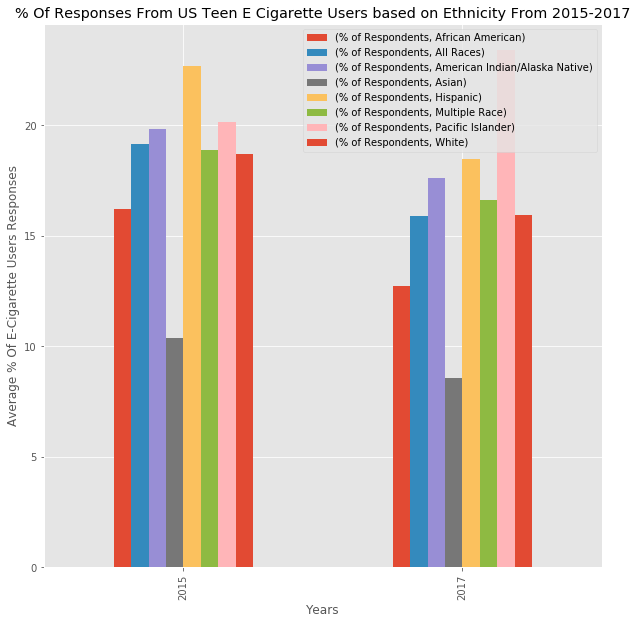

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
USA_eCig_Etinicity.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US Teen E Cigarette Users based on Ethnicity From 2015-2017")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()

In [29]:
grouped_usa_User_Status = USA.groupby(['Year','User Status']).mean()

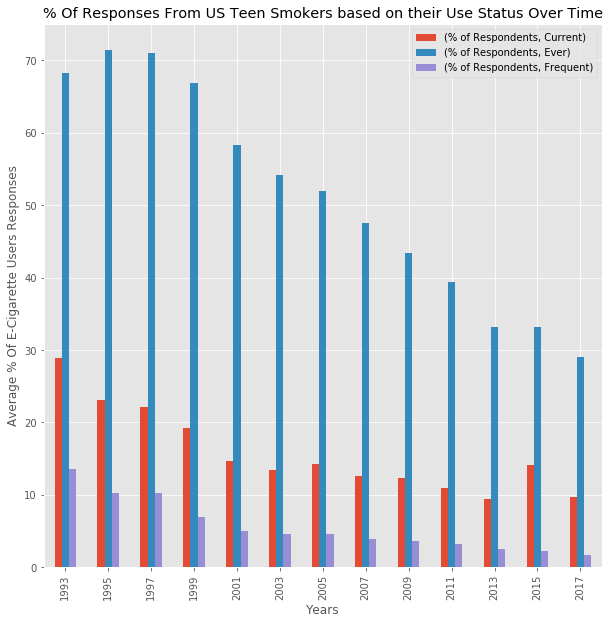

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
grouped_usa_User_Status.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US Teen Smokers based on their Use Status Over Time")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()

In [31]:
E_Cig_grouped_usa_User_Status = USA_eCig.groupby(['Year','User Status']).mean()

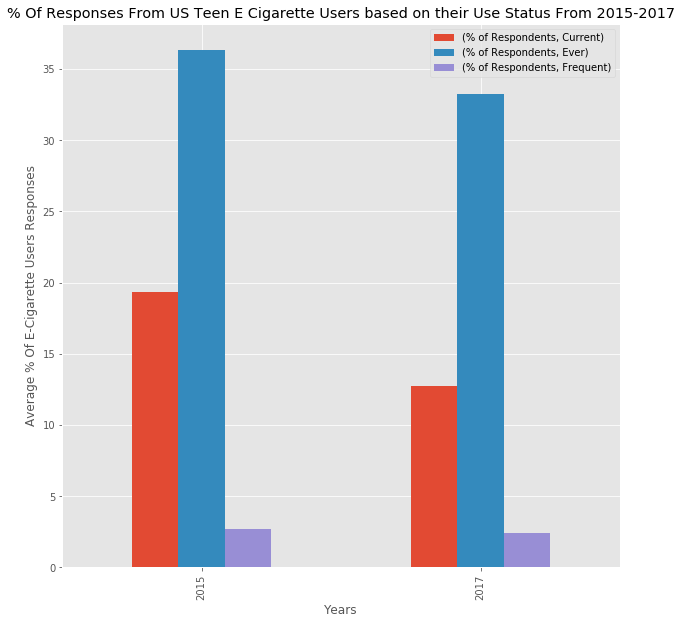

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
E_Cig_grouped_usa_User_Status.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US Teen E Cigarette Users based on their Use Status From 2015-2017")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()

In [54]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
USA_Use_type_grp=USA.groupby(['Year','Use Type']).mean()
USA_Use_type_grp.head()

% of Respondents
Year Use Type                                       
1993 Cigarette Use (Youth)                 36.571579
1995 Cigarette Use (Youth)                 37.818543
     Smokeless Tobacco Use (Youth)          7.964737
1997 Cigarette Use (Youth)                 40.188418
     Smokeless Tobacco Use (Youth)          6.419583

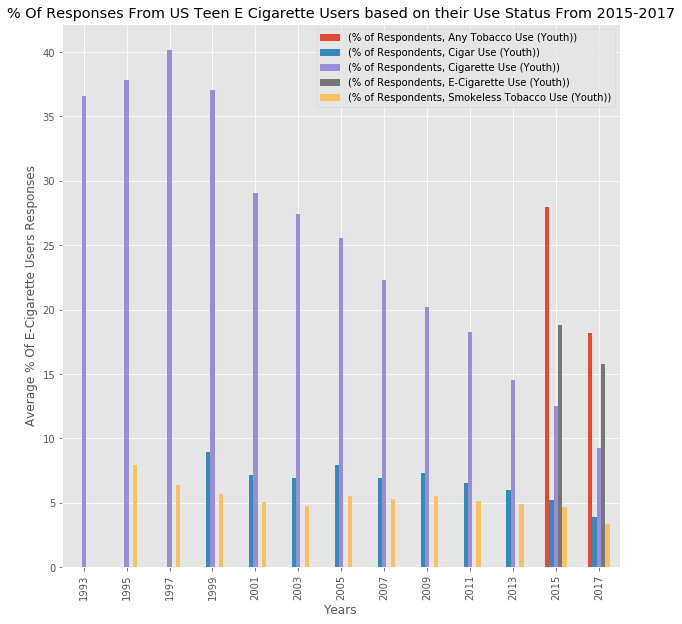

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
USA_Use_type_grp.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US Teen E Cigarette Users based on their Use Status From 2015-2017")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()

In [34]:
grouped_usa_Frequency = USA.groupby(['Year']).size()
grouped_usa_Frequency


Year
1993     285
1995     492
1997     594
1999     803
2001    1083
2003    1385
2005    1603
2007    1934
2009    2267
2011    2393
2013    2621
2015    3499
2017    3685
dtype: int64

In [1]:
#grouped_usa_Frequency.value_counts().plot(kind='pie',figsize=(15,15))

In [36]:

Avg_USA=USA[['% of Respondents']]=USA[['% of Respondents']].astype(float)


In [37]:
National= renamed_df.loc[renamed_df["State"] =="National (States and DC)"]
National.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,User Status,Education,geolocation
2366,US,2015,National (States and DC),E-Cigarette Use (Youth),User Status,Current E-Cigarette User,25.8,721,Overall,All Ages,Multiple Race,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7236,US,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,5.4,7450,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7244,US,1995,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7251,US,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.6,6467,Female,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7261,US,2009,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.5,6698,Overall,All Ages,White,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [38]:
no_null_National =National.dropna(how='any')
no_null_National.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,User Status,Education,geolocation
2366,US,2015,National (States and DC),E-Cigarette Use (Youth),User Status,Current E-Cigarette User,25.8,721,Overall,All Ages,Multiple Race,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7236,US,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,5.4,7450,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7251,US,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.6,6467,Female,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7261,US,2009,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.5,6698,Overall,All Ages,White,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7282,US,2003,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.9,372,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [39]:
Ohio_df= renamed_df.loc[renamed_df["State"] =="Ohio"]
Ohio_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,User Status,Education,geolocation
149,OH,2013,Ohio,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
246,OH,2005,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Multiple Race,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
287,OH,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,American Indian/Alaska Native,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
365,OH,1999,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,NaN,NaN,Overall,All Ages,Asian,Ever,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
478,OH,1999,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,22.1,1993,Overall,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [40]:
no_null_OH =Ohio_df.dropna(how='any')
no_null_OH.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,User Status,Education,geolocation
478,OH,1999,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,22.1,1993,Overall,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
494,OH,2003,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4,544,Male,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
572,OH,2005,Ohio,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.2,661,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
696,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,51.5,1339,Overall,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
831,OH,2013,Ohio,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.2,864,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [41]:
no_null_National.dtypes

Location Code       object
Year                object
State               object
Use Type            object
Status              object
Frequency           object
% of Respondents    object
Sample Size         object
Gender              object
Age                 object
Race                object
User Status         object
Education           object
geolocation         object
dtype: object

In [42]:
#no_null_State.t0 float

no_null_National[['% of Respondents']]=no_null_National[['% of Respondents']].astype(float)

In [43]:
no_null_OH[['% of Respondents']]=no_null_OH[['% of Respondents']].astype(float)

In [44]:
no_null_OH.dtypes

Location Code        object
Year                 object
State                object
Use Type             object
Status               object
Frequency            object
% of Respondents    float64
Sample Size          object
Gender               object
Age                  object
Race                 object
User Status          object
Education            object
geolocation          object
dtype: object

In [45]:
#state_counts = converted_df["Race"].value_counts()
#state_counts.head()
# Finding the average weight of all students
#no_null_State["% of Respondents"].mean()

In [46]:
no_null_National.dtypes

Location Code        object
Year                 object
State                object
Use Type             object
Status               object
Frequency            object
% of Respondents    float64
Sample Size          object
Gender               object
Age                  object
Race                 object
User Status          object
Education            object
geolocation          object
dtype: object

In [47]:
# USA[['% of Respondents']]=USA[['% of Respondents']].astype(float)

In [48]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_OH_df = no_null_OH.groupby(['Location Code','Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])


# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_OH_df)

In [49]:
grouped_OH_comparison = grouped_OH_df.mean()
grouped_OH_comparison

% of Respondents
Location Code Year Use Type                      Status         Frequency                       Gender  Age      Race             Education                    
OH            1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School              29.0
                                                                                                Male    All Ages All Races        High School              30.4
                                                                                                Overall All Ages African American High School              14.2
                                                                                                                 All Races        High School              29.7
                                                                                                                 White            High School              32.8
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School              66.0
                                                                                                Male    All Ages All Races        High School              71.0
                                                                                                Overall All Ages African American High School              65.1
                                                                                                                 All Races        High School              68.6
                                                                                                                 White            High School              68.8
                                                                Frequent Cigarette Smoker       Female  All Ages All Races        High School              12.3
                                                                                                Male    All Ages All Races        High School              16.1
                                                                                                Overall All Ages African American High School               3.3
                                                                                                                 All Races        High School              14.3
                                                                                                                 White            High School              16.6
              1997 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School              32.0
                                                                                                Male    All Ages All Races        High School              36.9
                                                                                                Overall All Ages African American High School              19.6
                                                                                                                 All Races        High School              34.5
                                                                                                                 White            High School              38.1
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School              67.8
                                                                                                Male    All Ages All Races        High School              70.5
                                                                                                Overall All Ages African American High School              67.3
                                                                                                                 All Races        High School  

In [50]:
grouped_usa_comparison = grouped_usa_df.mean()
grouped_usa_comparison

% of Respondents    17.496282
dtype: float64

In [51]:
#combined_df = combined_df.rename(columns={"% of Respondents_x":"% of USA","% of Respondents_y":"% of Ohio"})
#combined_df

In [52]:
combined_df = pd.merge(grouped_usa_comparison, grouped_OH_comparison,left_on=['Location Code','Year','Gender'],right_on=['Location Code','Year','Gender'],how="outer")
combined_df.fillna(0)


ValueError: Cannot merge a Series without a name

In [ ]:
combined_df = combined_df.rename(columns={"% of Respondents_x":"% of USA","% of Respondents_y":"% of Ohio"})

combined_df.fillna(0)